In [4]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

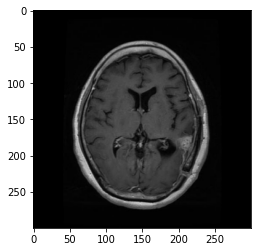

In [2]:
# Resolution
path = '/Users/james/MScCode/Final Project/Datasets/test_dataset_unprocessed'

saved = np.load(os.path.join(path,'features.npy'))

plt.imshow(saved[0].reshape(300,300,3))

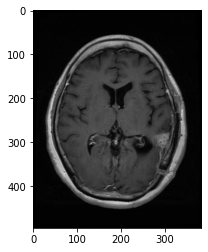

In [8]:
img_org = Image.open("/Users/james/MScCode/Final Project/Datasets/test_dataset_unprocessed/Te-gl_0019.jpg")
bbox = img_org.getbbox()
cropped_im = img_org.crop(bbox)

# Save the cropped image
# cropped_im.save("cropped_image.jpg")

plt.imshow(cropped_im)

In [ ]:
# Pixel loop - Working
img_org = Image.open("/Users/james/MScCode/Final Project/Datasets/test_dataset_unprocessed/Te-gl_0019.jpg")
img = img_org.convert("L")
pixels = img.load() # create the pixel map

for i in range(img.size[0]): # for every pixel:
    for j in range(img.size[1]):
        if pixels[i,j] != (25):
            # change to black if not red
            pixels[i,j] = (0)
            
bbox = img.getbbox()

cropped_im = img_org.crop(bbox)

# Save the cropped image
# cropped_im.save("cropped_image.jpg")

plt.imshow(cropped_im)

In [13]:
# Average Resolutions
import json

with open("/Users/james/MScCode/Final Project/preprocessing/res_testing/res_test.json", "r") as infile:
    data = json.load(infile)

resolutions = set([d['resolution'] for d in data])

average_res = {}
averages = []

for res in resolutions:
    accuracies = [d['test_accuracy'] for d in data if d['resolution']==res]
    tn = [d['true_neg'] for d in data if d['resolution']==res]
    tp = [d['true_pos'] for d in data if d['resolution']==res]
    fp = [d['false_pos'] for d in data if d['resolution']==res]
    fn = [d['false_neg'] for d in data if d['resolution']==res]
    avg_tn = (sum(tn) / len(tn))
    avg_tp = (sum(tp) / len(tp))
    avg_fp = (sum(fp) / len(fp))
    avg_fn = (sum(fn) / len(fn))
    avg = (sum(accuracies) / len(accuracies))
    std = np.std(accuracies)
    averages.append([f'{res}x{res}', avg, std, avg_tp, avg_tn, avg_fp, avg_fn])
    average_res.update({res:avg})

sort_by_value = dict(sorted(average_res.items(), key=lambda item: item[1]))
sort_by_value
print(averages)

df = pd.DataFrame(averages, columns=['resolution', 'accuracy', 'std', 'tp', 'tn', 'fp', 'fn'])
df.sort_values(by=['accuracy'], ascending=False, inplace=True)
df.set_index('resolution', inplace=True)
df





[['64x64', 0.7690909361839294, 0.030986243727647467, 37.0, 13.76, 7.24, 8.0], ['320x320', 0.7375757837295532, 0.0421462746815911, 34.44, 14.24, 6.76, 10.56], ['32x32', 0.7357575869560242, 0.05336775299748354, 35.76, 12.8, 8.2, 9.24], ['240x240', 0.783030321598053, 0.033939400655888165, 37.16, 14.52, 6.48, 7.84], ['128x128', 0.7800000262260437, 0.034047451664946465, 36.52, 14.96, 6.04, 8.48]]


,accuracy,std,tp,tn,fp,fn
resolution,,,,,,
240x240,0.783030,0.033939,37.16,14.52,6.48,7.84
128x128,0.780000,0.034047,36.52,14.96,6.04,8.48
64x64,0.769091,0.030986,37.00,13.76,7.24,8.00
320x320,0.737576,0.042146,34.44,14.24,6.76,10.56
32x32,0.735758,0.053368,35.76,12.80,8.20,9.24
